<a href="https://colab.research.google.com/github/Si-kaR/Ai_Space/blob/main/sports_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Name : Robert Sika
# ID   : 89212025


# Assignment | Mid-Semester Project: Sports Prediction
# Due        | 22 Oct 23:59 | Week from now by 23:59

# Points     | 30
# File types | zip
# Submitting | file upload
# Available  | 29 Sep at 18:00 - 22 Oct at 23:59

In [3]:
# In sports prediction, large numbers of factors including the historical performance of the teams, results of matches,
# and data on players, have to be accounted for to help different stakeholders understand the odds of winning or losing.


# In this project, you are tasked to build a model(s) that predict a player's overall rating given the player's profile.


# Use the data set players_21 for training the model(s) and the data set players_22 for testing/evaluating the model(s):
# The datasets can be found under Module 7 >> FIFA 22 Datasets


# FIFA 22 Dataset: FIFA 22 complete player dataset is a collection of detailed attributes for every player
# registered in the latest edition of the FIFA 19 database. The description of the dataset is given here Links to an external site..
# However, you are encouraged to download a copy of the dataset given on Canvas.

1. Demonstrate the data preparation & feature extraction process [5]

In [4]:
# # Below are the stages involved in the data preparation and feature extraction process

In [5]:
# DATA PREPARATION
# 1. Load the Data: Import the necessary libraries (such as pandas, numpy) and
#    load the training dataset (players_21) and testing dataset (players_22) into pandas dataframes.

# 2. Data Exploration: Understand the structure of the data, check for missing values,
#    and gain insights into the available features.




# Importing all necessary libraries
import json
import numpy as np
import pandas as pd
from numpy import array
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Now mount drive to access file
from google.colab import drive
drive.mount('/content/drive')


# Now to access the respective files

# The data set players_21 for training the model(s)
players_21_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week_8/archive/players_21.csv')

# The data set players_22 for testing/evaluating the model(s)
players_22_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week_8/archive/players_21.csv')


Mounted at /content/drive


In [6]:
players_21_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [7]:
players_22_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [8]:
#Column 25 and 108 are the faulty columns.

# so we find the columns, and coerce them. change every value to something numeric

# how will I get the column number 25 and 108 out?
# I can use indices.
# # Index of column 25 is 24
# Index of column 108 is 107
players_22_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


In [9]:
players_22_df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [10]:
# In the players_22_df, columns 25 and 108 were the columns that had conflicting datetypes.

# Two ways to correct this include ;
#    1. Correcting the two columns by coercing them
#    2. Coercing the entire data

In [11]:
# First Attempt : Finding the faulty columns and coercing them
players_22_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


In [12]:
# Okay, now seeking the names of the 25th and 108th columns for coercing

player_22_df_column_25_name = players_22_df.columns[24]  # Index 24 corresponds to the 25th column
player_22_df_column_108_name = players_22_df.columns[107]  # Index 107 corresponds to the 108th column

print("Name of the 25th column:", player_22_df_column_25_name)
print("Name of the 108th column:", player_22_df_column_108_name)

Name of the 25th column: nation_team_id
Name of the 108th column: club_flag_url


In [13]:
# Now coerce them
players_22_df['nation_team_id'] = pd.to_numeric(players_22_df['nation_team_id'], errors='coerce')
players_22_df['club_flag_url'] = pd.to_numeric(players_22_df['club_flag_url'], errors='coerce')

In [14]:
# Confirm coerce
print(players_22_df['nation_team_id'].head())  # Check the coerced 25th column
print(players_22_df['club_flag_url'].head())  # Check the coerced 108th column


0    1369.0
1    1354.0
2       NaN
3       NaN
4    1325.0
Name: nation_team_id, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: club_flag_url, dtype: float64


In [15]:
## identifying Nans in our data, we have to two options now.
#      1. Remove  all Nans,
#              which will affect the entire row, leading to huge loss of data if Nans are dominant in too many part of the data
#      2. Impute
#              Where we can use strategies like sum, product, median, average, etc tof ill up the missing values (Nans)............This could be the better approach

In [16]:
# # IMPUTING

# Mean Imputation: Use the mean when your data is normally distributed and the missing values are completely at random.
# Mean imputation is sensitive to outliers and can distort the overall distribution if your data contains extreme values.
# To apply mean imputation using Pandas, you can use the fillna() method:
# python
# df.fillna(df.mean(), inplace=True)

# Median Imputation: Use the median when your data contains outliers or is not normally distributed.
# Median imputation is more robust than mean imputation because it is not affected by extreme values.
# To apply median imputation using Pandas:
# python
# df.fillna(df.median(), inplace=True)

# Mode Imputation: Use the mode when dealing with categorical or discrete data.
# Mode imputation replaces missing values with the most frequently occurring value in each column.
# To apply mode imputation using Pandas:
# python
# df.fillna(df.mode().iloc[0], inplace=True)

# Advanced Imputation Techniques: For more complex datasets, you can consider machine learning-based imputation methods,
# such as k-nearest neighbors (KNN) or regression imputation. These methods predict missing values based on the relationships between features in your data.
# For KNN imputation, you can use libraries like scikit-learn:
# python
#     from sklearn.impute import KNNImputer
#     imputer = KNNImputer(n_neighbors=5)
#     df_imputed = imputer.fit_transform(df)

# When applying any imputation technique, it's crucial to fit the imputer on your training data and then use the same imputer to
# transform both the training and testing datasets. This ensures consistency in imputation across different subsets of your data.

In [18]:
# starting with MEAN
# Figuring out if MEAN is a best strategy.

# NORMAL DISTRIBUTION   &&    RANDOMLY SORTED MISSING VALUES
# To check if your data is normally distributed and if missing values are completely at random,
# we can use statistical tests, visualizations, and domain knowledge.
# 1. Statistical Tests:

    # Shapiro-Wilk Test: This test can be used to check if a sample comes from a normal distribution.
    # If the p-value from this test is greater than 0.05, you fail to reject the null hypothesis that the data is normally distributed.
from scipy.stats import shapiro
stat, p = shapiro(players_22_df)


# Check if data has outliers

TypeError: ignored

In [19]:
# The error you're encountering suggests that your dataset contains columns with mixed data types (both strings and integers).
# Statistical tests like Shapiro-Wilk assume that the data is numeric.
# When attempting to perform the Shapiro-Wilk test, the function encounters a comparison issue between a string and an integer.

# To address this, you need to ensure that you're applying the normality test to a numerical
# column that contains only numeric values.

# Identify Numeric Columns: First, identify the columns in your players_22_df DataFrame that contain numerical data.
#
players_22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(17), int64(44), object(49)
memory usage: 15.9+ MB


In [20]:
players_22_df.dtypes

sofifa_id             int64
player_url           object
short_name           object
long_name            object
player_positions     object
                     ...   
player_face_url      object
club_logo_url        object
club_flag_url       float64
nation_logo_url      object
nation_flag_url      object
Length: 110, dtype: object

In [21]:
# Idenitified the numeric columns
numeric_columns = players_22_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

In [22]:
# Now ot apply the Shapiro Wilk's test again, but this time only to the numeric columns
stat, p = shapiro(players_22_df[].dropna())  # Drop NaN values before performing the test

SyntaxError: ignored

In [23]:
normality_results = players_22_df[numeric_columns].apply(lambda col: shapiro(col.dropna())[1])

print(normality_results)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: ignored

In [24]:
# In this project, you are tasked to build a model(s) that predict a player's overall rating given the player's profile.


In [25]:
# # Use the data set players_21 for training the model(s) and the data set players_22 for testing/evaluating the model(s):


In [26]:
# # # # # # # #       PLAYERS_21    FOR   TRAINING

In [27]:
# Certainly! If you're focusing on the players_21 dataset for training your models,
# you can start by exploring the data, understanding its features, and preparing it for training.

In [28]:
# Exploratory Data Analysis (EDA):

#     Check the first few rows of the dataset to understand its structure
#     Check the summary statistics: players_21.describe()
#     Check for missing values: players_21.isnull().sum()
#     Explore the distribution of numeric features using histograms or box plots.
#     Explore the relationships between features using scatter plots or correlation matrices.





In [29]:
#     Check the first few rows of the dataset to understand its structure:
players_21_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [53]:
players_21_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/gb-eng.png


There are missing values

In [30]:
#     Check the summary statistics
players_21_df.describe()


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18944.000000,18944.000000,18944.000000,1.870700e+04,18719.000000,18944.000000,18944.000000,18944.000000,18719.000000,18719.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,2083.000000
mean,226232.328917,65.677787,71.086729,2.902288e+06,9148.482825,25.225823,181.190773,75.016892,47908.905551,1.355468,...,57.978674,46.470017,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309,37.203553
std,27166.574284,7.002278,6.109985,7.743775e+06,19893.149956,4.697354,6.825672,7.057140,53906.733776,0.739015,...,12.118390,20.169591,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121,10.714523
min,41.000000,47.000000,47.000000,9.000000e+03,500.000000,16.000000,155.000000,50.000000,1.000000,1.000000,...,12.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,210028.750000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,461.000000,1.000000,...,50.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28.000000
50%,232301.500000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1913.000000,1.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,37.000000
75%,246745.750000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,110986.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,258970.000000,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,206.000000,110.000000,114899.000000,4.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,65.000000


Checking the summary statistics of a dataset using the describe() function in Pandas provides a quick overview of the numerical features' distribution. It's a valuable step in the exploratory data analysis (EDA) process for several reasons:

* Central Tendency: Summary statistics like mean (average) give you an idea of the central tendency of the numerical features. A higher mean suggests a higher average value across the dataset, and a lower mean suggests a lower average value.

* Dispersion: Metrics like standard deviation, minimum, and maximum values give you insights into how spread out the data is. A higher standard deviation indicates more variability in the data.

* Identifying Outliers: By looking at the minimum and maximum values, you can identify potential outliers. Outliers are data points that significantly differ from the rest of the dataset and can impact the analysis.

* Understanding the Scale: If you have features on different scales, it can affect algorithms like gradient descent in machine learning. Summary statistics help you identify such disparities.

* Data Distribution: The 25th, 50th (median), and 75th percentiles give you an understanding of the data distribution. For example, if the 75th percentile is much higher than the median, it indicates a positively skewed distribution.

  * Central Tendency:
        Overall Rating (overall): The central tendency is around 65.68, indicating the average skill level of players.
        Potential (potential): The central tendency is around 71.09, indicating the average potential skill level of players.
        Age (age): The central tendency is around 25.23, indicating the average age of players.

          * Mean: The mean represents the average value of a feature. For instance, the mean overall rating is approximately 65.68. This indicates the average player rating in the dataset is around 66.
          
          * Median (50th Percentile): The median is the middle value of a feature when the data is sorted in ascending order. For example, the median overall rating is 66. This suggests that half of the players have a rating of 66 or below, and the other half have a rating of 66 or above.
          
          * Mode: The mode is the most frequently occurring value in a feature. The mode is not shown in the summary statistics but is important to identify the most common values.

  * Dispersion:
        Features like overall, potential, value_eur, wage_eur, age, height_cm, and weight_kg have varying standard deviations, indicating variability in these attributes.

        * Standard Deviation: Standard deviation measures the spread of values around the mean.
        For instance, the standard deviation for overall rating is approximately 7.00.
        A higher standard deviation indicates that the player ratings are spread out over a larger range, showing diversity in player skills.

        * Minimum and Maximum: These values represent the smallest and largest values in a feature, respectively.
        For example, the minimum age is 16, and the maximum is 53.
        This demonstrates the age range of players in the dataset.
   
        * Percentiles (25th, 50th, and 75th Percentiles): Percentiles indicate the values below which a given percentage of observations fall.
        For instance, the 25th percentile (Q1) overall rating is 61, suggesting that 25% of players have a rating of 61 or lower.

  * Identification of Outliers:
        Outliers could be identified by comparing minimum and maximum values across features. For example, extreme values in value_eur or wage_eur might indicate outliers.

  * Understanding Scale:
        Features like height_cm and weight_kg have different scales, representing height in centimeters and weight in kilograms, respectively.

  * Data Distribution:
        Percentiles provide insights into data distribution. For example, the 75th percentile for overall is 70, indicating that 75% of players have a rating of 70 or below.

Next Steps:

    * Handling Outliers: Investigate potential outliers and decide whether to remove, transform, or keep them based on domain knowledge. Tools like box plots can aid in this analysis.

    * Feature Scaling: Due to the varying scales of features, consider applying techniques like Min-Max scaling or Standardization to bring all features to a similar scale.

    * Feature Engineering: Create new features or transform existing ones to enhance model performance. For instance, you could derive a BMI (Body Mass Index) feature using height_cm and weight_kg.

    ******* Handling Missing Values: Address any missing values in the dataset. Impute missing data using appropriate strategies based on the nature of the missingness and the data distribution.

    * Correlation Analysis: Explore correlations between features. High correlations might suggest multicollinearity, which can impact some machine learning algorithms.

    * Visualization: Visualize distributions, correlations, and other patterns in the data to gain more insights.



In [31]:
#     Check for missing values
players_21_df.isnull().sum()


sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url         225
club_flag_url         225
nation_logo_url     17817
nation_flag_url         0
Length: 110, dtype: int64

In [52]:
players_21_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/gb-eng.png


I see that there are missing values in the columns club_logo_url and club_flag_url (both with 225 missing values) as well as nation_logo_url (with 17817 missing values):

    Removal: If these columns are not essential for the analysis,
    and their missing values do not carry crucial information,
    we could consider dropping them entirely using the drop() function in Pandas.

    Imputation: If these columns are important but have only a few missing values,
    we could consider filling the missing values.
    For numerical columns, we could use the mean, median, or another appropriate statistic.
    For categorical data, we could use the mode (most common value).


In [40]:
# Convert 'club_logo_url' and 'club_flag_url' columns to numeric values and then fill missing values with mean
players_21_df['club_logo_url'] = pd.to_numeric(players_21_df['club_logo_url'], errors='coerce')
players_21_df['club_flag_url'] = pd.to_numeric(players_21_df['club_flag_url'], errors='coerce')

# Fill missing values with mean
players_21_df['club_logo_url'].fillna(players_21_df['club_logo_url'].mean(), inplace=True)
players_21_df['club_flag_url'].fillna(players_21_df['club_flag_url'].mean(), inplace=True)

# Fill 'nation_logo_url' with mode
players_21_df['nation_logo_url'].fillna(players_21_df['nation_logo_url'].mode()[0], inplace=True)


In [41]:
#     Check for missing values

players_21_df.isnull().sum()


sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url       18944
club_flag_url       18944
nation_logo_url         0
nation_flag_url         0
Length: 110, dtype: int64

It looks like we still have missing values in the 'club_logo_url' and 'club_flag_url' columns.

We filled these columns with the mean and they still contain missing values, it's possible that the mean calculation didn't work as intended due to the data type of the columns.

In [42]:
# Checking out the two columns

print(players_21_df['club_logo_url'].dtype)
print(players_21_df['club_flag_url'].dtype)

# This will help us confirm the data types of these columns.
# If they are not numeric (for example, if they are strings or objects),
# filling missing values with the mean won't work, and we might need a different
# approach to handle these missing values.

float64
float64


In [44]:
# Great, the data types of 'club_logo_url' and 'club_flag_url' columns are float64,
# so filling missing values with the mean should work.
# Let's try filling the missing values again for these columns:

players_21_df['club_logo_url'].fillna(players_21_df['club_logo_url'].mean(), inplace=True)
players_21_df['club_flag_url'].fillna(players_21_df['club_flag_url'].mean(), inplace=True)

#     Check for missing values
players_21_df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url       18944
club_flag_url       18944
nation_logo_url         0
nation_flag_url         0
Length: 110, dtype: int64

In [49]:
players_21_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,Unknown,Unknown,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/gb-eng.png


I see, it seems there might be an issue with filling the missing values using the mean. A different approach to fill the missing values in the 'club_logo_url' and 'club_flag_url' columns.

We can fill the missing values with a constant or a placeholder. For example, we can fill the missing values with a string like 'Unknown' for these URL columns.

In [47]:
players_21_df['club_logo_url'].fillna('Unknown', inplace=True)
players_21_df['club_flag_url'].fillna('Unknown', inplace=True)

players_21_df.isnull().sum()

sofifa_id           0
player_url          0
short_name          0
long_name           0
player_positions    0
                   ..
player_face_url     0
club_logo_url       0
club_flag_url       0
nation_logo_url     0
nation_flag_url     0
Length: 110, dtype: int64

In [54]:

# Data Cleaning and Preprocessing:

#     Handle missing values (impute or remove rows/columns with missing data).
#     Encode categorical variables if needed (using techniques like one-hot encoding or label encoding).
#     Normalize or standardize numeric features if necessary.
#     Split the data into features (X) and target variable (y).

In [33]:
# Feature Selection:

#     Identify important features that are likely to influence the target variable.
#     Consider techniques like feature importance scores or correlation analysis.

In [34]:
# Model Selection and Training:

#     Choose appropriate machine learning algorithms based on the problem type (classification, regression, etc.) and the nature of the data.
#     Split the data into training and validation sets: train_test_split(X, y, test_size=0.2, random_state=42)
#     Train the selected models on the training data.

In [35]:
# Model Evaluation:

#     Evaluate the trained models on the validation set using appropriate metrics (accuracy, RMSE, etc.).
#     Fine-tune hyperparameters if needed using techniques like grid search or randomized search.


In [36]:
# Final Model Selection:

#     Select the best-performing model based on validation set performance

In [37]:
# Testing and Evaluation (using players_22):

#     Apply the selected model(s) to the players_22 dataset for evaluation.
#     Assess the model(s) performance using appropriate metrics.

# I'VE JUST REALISED, THE NANs WE WERE GETTING WERE LINKS TO DATA LIKE IMAGE OF CLUB LOGO, CLUB FLAG, NAD NATION LOGO.

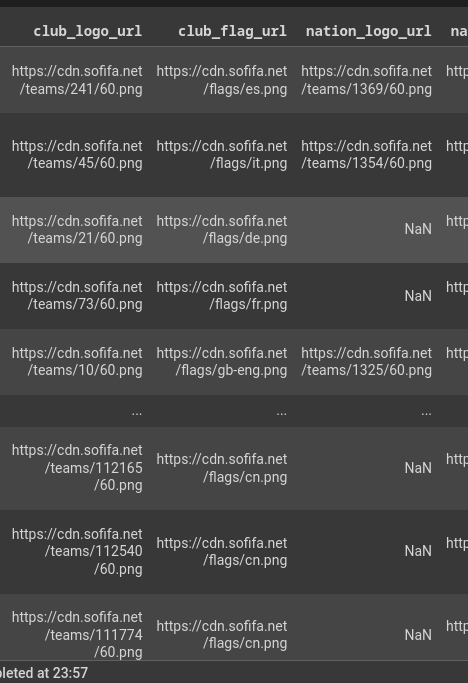


* These data we can do without. So the best approach was     NOT   to remove the row,    but rather to IGNORE OR REMOVE the column


An ALTERNATIVE TO REMOVING THE COLUMNS WAS MAKING IT ALL NANs    by   IMPUTING as can be seen below,

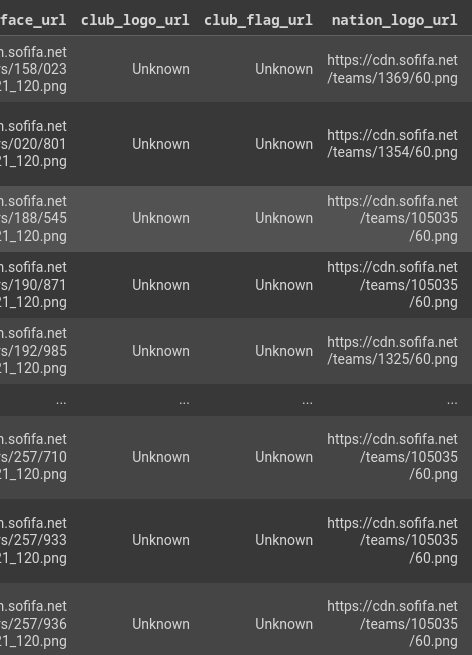

though I believe a better approach like completely removing the Data  COLUMNS   would have been better, cuz, imagine, we wouldn't even have been able to LabelEncode or OneHot Encode properly



* We can still try that though.   Change it to numericals like we did in the Fraud_Risk   lab,       except   it wouldn't be   categoriccal data? so we'd need to scale?

or it might be categorical  and we'd be able to follow the right norms for it.